# TC Lab First-Principles Simulation
Imports

In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt
from gekko import GEKKO

Set up the model

In [12]:
m = GEKKO(remote=False)

Set up the model time array (10 minutes, 1 second intervals)

In [13]:
m.time = np.linspace(0, 60*10, 60*10+1)

Define some constants

In [14]:
t0 = 23.0 + 273.15    # Initial temperature
tAmb = 23.0 + 273.15  # Ambient temperature
area = 12.0e-4   # Area
mass = 4.0e-3
Cp = 500.0
sig = 5.67e-8    # Stefsn-Boltzmann constant
eps = 0.9        # Emissivity 
alpha = 0.01         # Heater scaling facto

GEKKO Parameters

In [15]:
q0 = np.zeros(m.time.shape)
q0[:60]     = 0.0
q0[60:240]  = 100.0
q0[240:300] = 0.0
q0[300:360] = 100.0
q0[360:]    = 0.0
Q = m.Param(value=q0)

U = m.Param(value=10.0)

GEKKO Variables

In [16]:
T = m.Var(value=t0)

GEKKO Equations

In [17]:
m.Equation(mass*Cp*T.dt()== \
           U*area*(tAmb-T) \
           + eps*sig*area*(tAmb**4-T**4) \
           + alpha*Q)

GEKKO simulation options

In [18]:
m.options.IMODE = 4

Solve the model

In [19]:
m.solve(disp=False)

Display the results

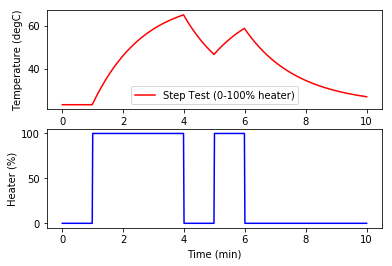

In [20]:
plt.figure(1)

plt.subplot(2,1,1)
plt.plot(m.time/60.0,np.array(T.value)-273.15,'r-')
plt.ylabel('Temperature (degC)')
plt.legend(['Step Test (0-100% heater)'])

plt.subplot(2,1,2)
plt.plot(m.time/60.0,np.array(Q.value),'b-')
plt.ylabel('Heater (%)')
plt.xlabel('Time (min)')

plt.show()